<a href="https://colab.research.google.com/github/njiririkinyanjui/Unsupervised_Learning_In_R/blob/main/Part_3__R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

* You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax).
* Performing  Association Rules in the marketing dataset and later providing recommendations based on your insights. The association rules will allow one to identify relationships between variables in the dataset

* Loading the Data
* Association Rules

# Loading the libraries and Dataset

## Loading the Libraries

In [1]:
# Importing the libraries

library(tidyverse)

# We install the required arules library 

install.packages("arules")

# Loading the arules library
#
library(arules)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




## Data loading

In [2]:
# Loading the data
path <-"http://bit.ly/SupermarketDatasetII"

Supermarket_dt <- read.transactions(path, sep = ",")

Supermarket_dt

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [3]:
# Understanding the shape of the dataset 

dim(Supermarket_dt)


[1] 7501  119

# Associative rules

In [4]:
# Verifying the object's class
# This should show us transactions as the type of data that we will need

class(Supermarket_dt)

[1] "transactions"
attr(,"package")
[1] "arules"

In [5]:
# Previewing our first 5 Supermarket_dt dataset
#
inspect(Supermarket_dt[1:5])

# Combinations of the first five most purchased items

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


In [6]:
# If we wanted to preview the items that make up our dataset,
# alternatively we can do the following
# 

items <- as.data.frame(itemLabels(Supermarket_dt))
colnames(items) <- "Item"
head(items, 10) 

# Top 10 items in the dataset

,Item
,<chr>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [7]:
# Generating a summary of the Supermarket dataset
# This would give us some information such as the most purchased items, 
# distribution of the item sets (no. of items purchased in each transaction), etc.
# 
summary(Supermarket_dt)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [8]:
# Exploring the frequency of some articles 
# i.e. transacations ranging from 8 to 10 and performing 
# some operation in percentage terms of the total transactions 

itemFrequency(Supermarket_dt[, 8:10],type = "absolute")
round(itemFrequency(Supermarket_dt[, 8:10],type = "relative")*100,2)

black tea blueberries  body spray 
        107          69          86

black tea blueberries  body spray 
       1.43        0.92        1.15

In [9]:
# Exploring the frequency of some articles 
# i.e. transacations ranging from 15 to 25 and performing 
# some operation in percentage terms of the total transactions 

itemFrequency(Supermarket_dt[, 15:25],type = "absolute")
round(itemFrequency(Supermarket_dt[, 15:25],type = "relative")*100,2)

burgers      butter        cake  candy bars     carrots cauliflower 
        654         226         608          73         115          36 
    cereals   champagne     chicken       chili   chocolate 
        193         351         450          46        1229

burgers      butter        cake  candy bars     carrots cauliflower 
       8.72        3.01        8.11        0.97        1.53        0.48 
    cereals   champagne     chicken       chili   chocolate 
       2.57        4.68        6.00        0.61       16.38

In [10]:
# Producing a chart of frequencies and filtering 
# to consider only items with a minimum percentage 
# of support / considering a top 10 of items
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))

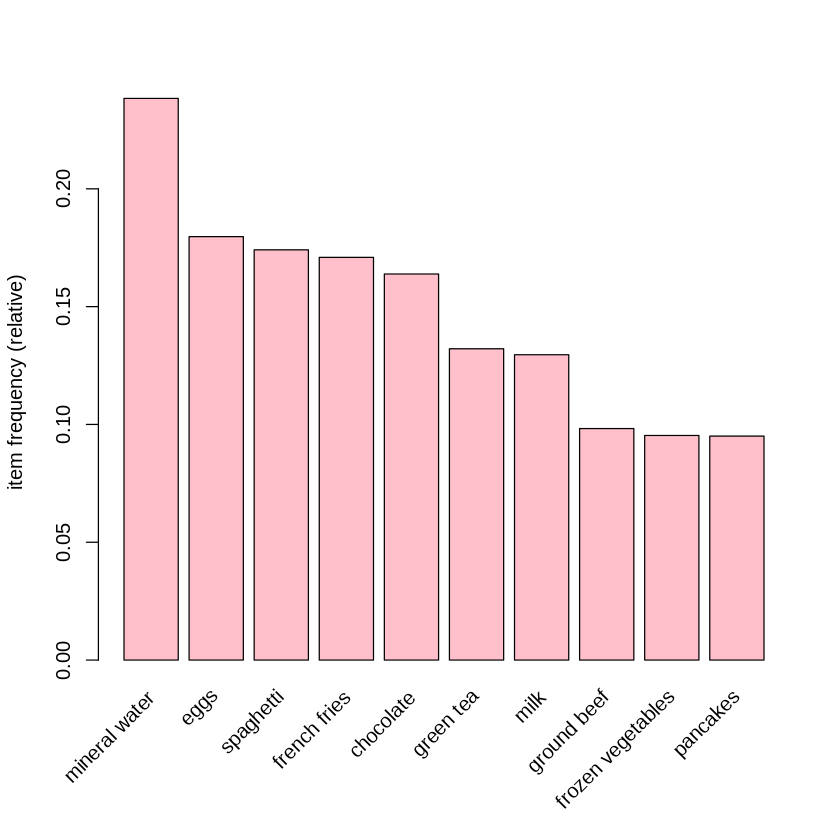

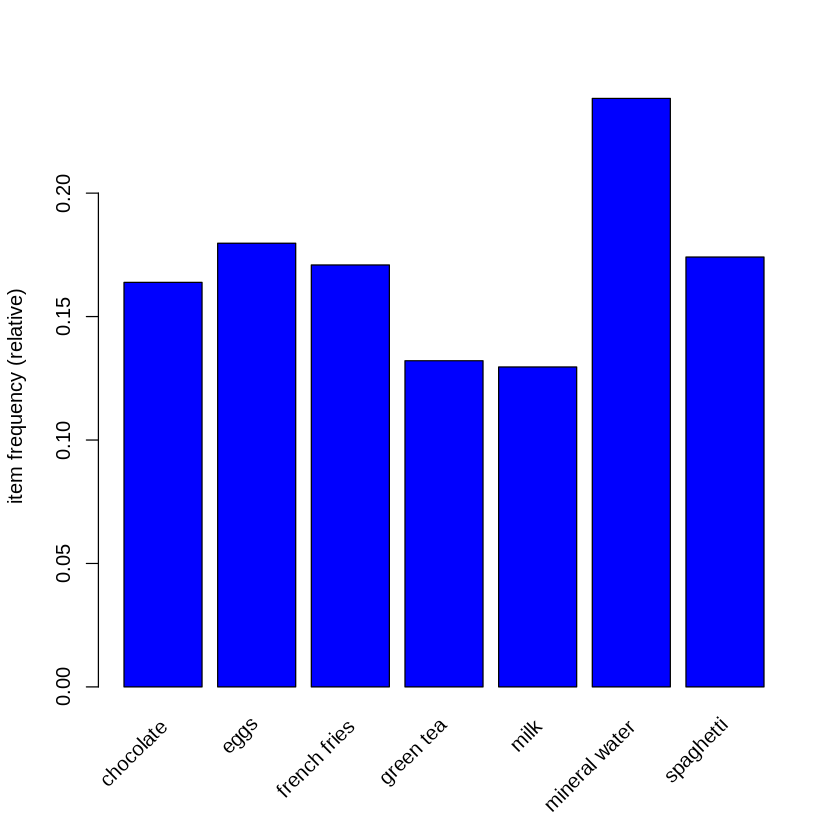

In [11]:
# plot the frequency of items
#
itemFrequencyPlot(Supermarket_dt, topN = 10,col="pink")
itemFrequencyPlot(Supermarket_dt, support = 0.1,col="blue")

In [12]:
# Building a model based on association rules 
# using the apriori function 
# We use Min Support as 0.001 and confidence as 0.8
# 
rules <- apriori (Supermarket_dt, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [13]:
# We use measures of significance and interest on the rules, 
# determining which ones are interesting and which to discard.

# However since we built the model using 0.001 Min support 
# and confidence as 0.8 we obtained 74 rules.
# With a support of 0.002 the set rules reduced to 2.

# However, in order to illustrate the sensitivity of the model to these two parameters, 
# we will see what happens if we increase the support or lower the confidence level

# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (Supermarket_dt,parameter = list(supp = 0.002, conf = 0.8)) 

rules2

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 2 rules 

In [14]:
# Building apriori model with Min Support as 0.001 and confidence as 0.6.

rules3 <- apriori (Supermarket_dt, parameter = list(supp = 0.001, conf = 0.6)) 
rules3
# When we lower the confidence t0 0.6 the set rules increases to 545

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [545 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 545 rules 

In [15]:
# Building apriori model with Min Support as 0.002 and confidence as 0.6.

rules4 <- apriori (Supermarket_dt, parameter = list(supp = 0.002, conf = 0.6)) 
rules4
# Increasing the support from 0.001 to 0.002 and maintaining the same confidence at 0.6 the set rules decrease to 43

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [43 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 43 rules 

In [16]:
# We can perform an exploration of our model 
# through the use of the summary function as shown

# Upon running the code, the function would give us information about the model 
# i.e. the size of rules, depending on the items that contain these rules. 
# In our above case, most rules have 3 and 4 items though some rules do have upto 6. 
# More statistical information such as support, lift and confidence is also provided.

summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
           data ntransactions support confidence
 Supermarket_dt          7501   0.001        0.8

In [17]:
# Observing rules built in our model i.e. first 5 model rules
# 
inspect(rules[1:5])


# Interpretation of the first rule:
# ---
# If someone buys liquor and red/blush wine, they are 90% likely to buy bottled beer too

    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


In [18]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
# We can also use different criteria such as: (by = "lift" or by = "support")
# 
rules <- sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

# Interpretation
# ---
# The given five rules have a confidence of 100

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


In [19]:
# If we're interested in making a promotion relating to the sale of milk, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing milk
# ---
# 
milk <- subset(rules, subset = rhs %pin% "milk")
 
# Then order by confidence
milk <- sort(milk, by="confidence", decreasing=TRUE)
inspect(milk[1:5])

    lhs                                  rhs    support     confidence
[1] {cake,meatballs,mineral water}    => {milk} 0.001066524 1.0000000 
[2] {escalope,hot dogs,mineral water} => {milk} 0.001066524 0.8888889 
[3] {meatballs,whole wheat pasta}     => {milk} 0.001333156 0.8333333 
[4] {black tea,frozen smoothie}       => {milk} 0.001199840 0.8181818 
[5] {burgers,ground beef,olive oil}   => {milk} 0.001066524 0.8000000 
    coverage    lift     count
[1] 0.001066524 7.717078  8   
[2] 0.001199840 6.859625  8   
[3] 0.001599787 6.430898 10   
[4] 0.001466471 6.313973  9   
[5] 0.001333156 6.173663  8   


In [20]:
# What if we wanted to determine items that customers might buy 
# who have previously bought milk?
# ---
# 
# Subset the rules
milk <- subset(rules, subset = lhs %pin% "milk")

# Order by confidence
milk <- sort(milk, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(milk[15:19])

    lhs                                rhs             support     confidence
[1] {chocolate,hot dogs,milk}       => {mineral water} 0.001066524 0.8       
[2] {avocado,burgers,milk}          => {spaghetti}     0.001066524 0.8       
[3] {cookies,green tea,milk}        => {french fries}  0.001066524 0.8       
[4] {cake,eggs,milk,turkey}         => {mineral water} 0.001066524 0.8       
[5] {chocolate,eggs,milk,olive oil} => {mineral water} 0.001066524 0.8       
    coverage    lift     count
[1] 0.001333156 3.356152 8    
[2] 0.001333156 4.594793 8    
[3] 0.001333156 4.680811 8    
[4] 0.001333156 3.356152 8    
[5] 0.001333156 3.356152 8    


# Conclusion

* Loading the dataset with the transactions package automatically cleans the data and provides a dataset with 7501 unique rows and 119 columns
* The most purchased list item is; 
-- {almonds, antioxydant juice, avocado, cottage cheese, energy drink, frozen smoothie, green grapes, green tea, honey, low fat yogurt, mineral water, olive oil, salad, salmon, shrimp, spinach, juice, vegetables mix, whole weat flour, yams} 
* Most frequent purchased items are; mineral water, eggs, spaghetti, french fries and chocolate 

* Using Min Support as 0.001 and confidence as 0.8 the set rules are 74.
* Using Min Support as 0.002 and confidence as 0.8 the set rules are 2.
* Using Min Support as 0.001 and confidence as 0.6 the set rules are 545. 
* Using Min Support as 0.002 and confidence as 0.6 the set rules are 43.
-- We can conclude that maintaing the same confidence and increasing the min support decreases the set rules
-- We can conclude that maintaing the same min support and decreasing the confidence the set rules increases.